In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['beds'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['beds'].max()
Min = Milan['beds'].min()
Limites = [Min, Max]
Limites

[0.0, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

5.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706
ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.32207095250647944

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 5, 16)
intervalos

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
       3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
       5.        ])

In [10]:
# Creamos las categorías

categorias = [
    "Sin cama",
    "Espacio mínimo",
    "Espacio compacto",
    "Cama individual",
    "Cama semi-doble",
    "Cama doble",
    "Doble amplia",
    "Cama triple",
    "Triple amplia",
    "Cuádruple compacta",
    "Cuádruple estándar",
    "Familiar pequeña",
    "Familiar estándar",
    "Familiar grande",
    "Familiar extra grande"
]


In [11]:
# Creamos las ctegorias en la columna numerica
Milan['beds'] = pd.cut ( x =Milan ['beds'], bins = intervalos, labels = categorias )
Milan['beds']

0        Espacio compacto
1        Espacio compacto
2        Familiar pequeña
3           Triple amplia
4        Espacio compacto
               ...       
23700    Familiar pequeña
23701    Espacio compacto
23702    Espacio compacto
23703          Cama doble
23704          Cama doble
Name: beds, Length: 23705, dtype: category
Categories (15, object): ['Sin cama' < 'Espacio mínimo' < 'Espacio compacto' < 'Cama individual' ... 'Familiar pequeña' < 'Familiar estándar' < 'Familiar grande' < 'Familiar extra grande']

In [12]:
table1 = freq_tbl(Milan['beds'])
table1

,beds,frequency,percentage,cumulative_perc
0,Cama doble,10102,0.426155,0.437885
1,Espacio compacto,9425,0.397595,0.846424
2,Triple amplia,2309,0.097406,0.946511
3,Familiar pequeña,949,0.040034,0.987646
4,Familiar extra grande,285,0.012023,1.000000
5,Sin cama,0,0.000000,1.000000
6,Espacio mínimo,0,0.000000,1.000000
7,Cama individual,0,0.000000,1.000000
8,Cama semi-doble,0,0.000000,1.000000
9,Doble amplia,0,0.000000,1.000000


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,beds,frequency
0,Cama doble,10102
1,Espacio compacto,9425
2,Triple amplia,2309
3,Familiar pequeña,949
4,Familiar extra grande,285
5,Sin cama,0
6,Espacio mínimo,0
7,Cama individual,0
8,Cama semi-doble,0
9,Doble amplia,0


In [14]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 0]
Filtro

,beds,frequency
0,Cama doble,10102
1,Espacio compacto,9425
2,Triple amplia,2309
3,Familiar pequeña,949
4,Familiar extra grande,285


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('beds')
Filtro_index

,frequency
beds,
Cama doble,10102
Espacio compacto,9425
Triple amplia,2309
Familiar pequeña,949
Familiar extra grande,285


<Axes: xlabel='beds'>

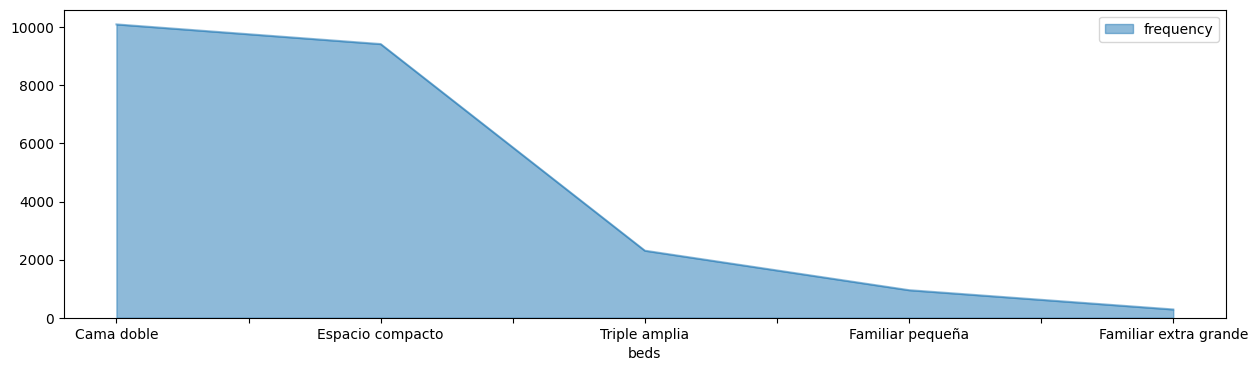

In [16]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)